In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
import os
import math
import pandas as pd

## Spectrogram

(195, 162, 4)
(195, 162)


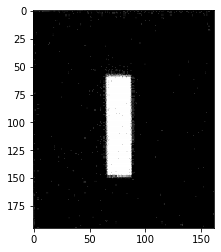

In [2]:
# Read image
img = plt.imread('image_test.png')
print(img.shape)

# Select just one layer (red) and convert to float
U_test = np.array(img[:,:,0], dtype = np.float64)
print(U_test.shape)

plt.imshow(U_test, cmap = 'gray')
plt.show()

In [3]:
# Convert rgb to gray 
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.144])

In [4]:
# Display the spectrum
def plotSpectre(image, Lx, Ly):
    (Ny, Nx, p) = image.shape
    fxm = Nx*1.0 / (2*Lx)
    fym = Ny*1.0 / (2*Ly)
    plt.imshow(image,extent=[-fxm,fxm,-fym,fym])
    plt.xlabel("fx")
    plt.ylabel("fy")
    
# Convert a matrix into an RGB image matrix
def matriceImage(matrice,gamma,rgb):
    s = matrice.shape
    a=1.0/gamma;
    norm=matrice.max()
    m = np.power(matrice/norm,a)
    im = np.zeros((s[0],s[1],3),dtype=np.float64)
    im[:,:,0] = rgb[0]*m
    im[:,:,1] = rgb[1]*m
    im[:,:,2] = rgb[2]*m
    return im

# Generates an RGB image from a matrix, by applying a logarithmic function
def matriceImageLog(matrice,rgb):
    s = matrice.shape
    m = np.log10(1+matrice)
    min = m.min()
    max = m.max()
    m = (m-min)/(max-min)
    im = np.zeros((s[0],s[1],3),dtype=np.float64)
    im[:,:,0] = rgb[0]*m
    im[:,:,1] = rgb[1]*m
    im[:,:,2] = rgb[2]*m
    return im

(195, 162)


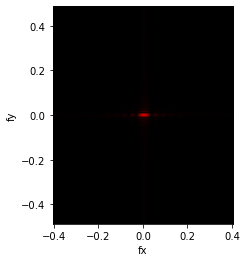

In [5]:
# The discrete Fourier transform
V = np.fft.fft2(U_test)

# Obtain the zero frequency center
VC = np.fft.fftshift(V)

# Calculates the power
P = np.power(np.absolute(VC),2)
print(P.shape)
# plt.imshow(P, cmap = 'gray')
# plt.show()

# Convert to RGB matrix
img = matriceImage(P, 2.0, [1.0,0.0,0.0])

# Display the spectrum
plotSpectre(img, 200.0, 200.0)

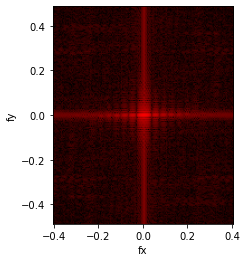

In [6]:
img = matriceImageLog(P,[1.0,0.0,0.0])

# Display the spectrum
plotSpectre(img, 200.0, 200.0)

**Load mat file**

In [4]:
def loadMatFile(file_path, file_name, key):
    """
    Load a mat file and return an item of the dictionary loaded.
    """    
    # read mat file dictionary
    dictionary = scipy.io.loadmat(file_path + file_name)
    
    # access item of a dictionary
    array = dictionary[key]
    
    return array

In [5]:
os.getcwd()

'C:\\Users\\ferna\\Desktop\\computerGeneratedHolography\\tests_wigner_distribution'

In [134]:
# Folder's path
#path = 'C:\\Users\\flucasamar\\Desktop\\Github\\computerGeneratedHolography'
path = 'C:\\Users\\ferna\\Desktop\\computerGeneratedHolography'

# Load hologram dataset
file_path = path + '\\output\\dataset\\'
file_name = 'hDataset.mat'
key = 'hDataset'
dat = loadMatFile(file_path, file_name, key)
print(dat.shape)

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\ferna\\Desktop\\computerGeneratedHolography\\output\\dataset\\hDataset.mat'

<class 'numpy.float64'>


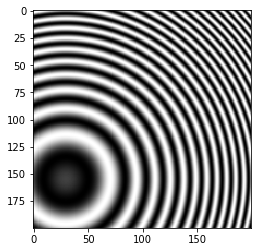

In [135]:
img = dat[:,:,1]
print(type(img[1,1]))

plt.imshow(np.real(img), cmap = 'gray')
plt.show()

**Spectrogram**

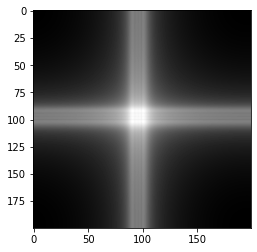

In [11]:
# The discrete Fourier transform
f = np.fft.fft2(img)

# Obtain the zero frequency center
fshift = np.fft.fftshift(f)

# Magnitude spectrum
magnitude_spectrum = 20*np.log(np.abs(fshift))

# Display
plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.show()

## 1D Wigner distribution from scratch

**Image analysis based on the 1D local-directional Wigner distribution** 

The analysis of digital images can be performed through the local frequency information they enclose. The task of gathering such local spatial-frequency information can be fulfilled by the use of one of the existing space/space-frequency image representations. One of the most popular space-frequency (SF) representations is the Wigner distribution (WD) [1].  The WD has been approximated for discrete signals under the name of  pseudo-Wigner distribution (PWD) and it has been mathematically defined as [2,3]

### $W(n,k)=2 \sum\limits_{m= -\frac{N}{2}}^{\frac{N}{2}-1} z(n+m)z^*(n-m) e^{-i2 \pi k \left(\frac{2m}{N} \right) }$   (1)

                 
In Eq.(1) the variable $z(n)$ represents the gray value of pixel $n$ in a given image $z$. A directional PWD may be calculated by using this equation in a tilted 1D pixel-by-pixel sliding window $L_{\theta}$  conforming a string of values $z=z(-N/2), ..., z(0), ..., z(N/2)$. The central position of the window matches exactly pixel $n$ on the image. Eq.(1) can be interpreted as the discrete Fourier transform (DFT) of the product  $r(n,m)= z(n+m)z^*(n-m)$. Here $z^*$ indicates the complex-conjugate of signal $z$ (note that $z=z^*$ for real valued images). The sum is limited to a spatial interval $(-N/2,N/2-1)$. In Eq.(1), $n$ and $k$ represent the space and frequency discrete variables respectively, and $m$ is a shifting parameter, which is also discrete. Hence,a $\theta$ oriented full pixel-wise PWD of the image can be calculated by shifting the window over all the pixels in it.  

[1] E. Wigner, "On the quantum correction for thermodynamic equilibrium",Phys. Rev. 40, 749–759 (1932)

[2] T. A. C. M. Claasen and W. F. G. Mecklenbra¨uker, "The Wigner distribution—a tool for time-frequency analysis, Parts I-III," Philips J. Res. 35, 217–250, 276–300, 372–389 (1980)

[3] K. H. Brenner, "A discrete version of the Wigner distribution function" Proc. EURASIP, Sig. Process. II: Theories Applications, pp.307–309 (1983)

**Pre-processing**

Test image: (200, 200)


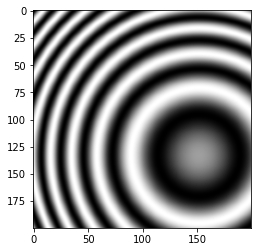

Frame background: (208, 208)


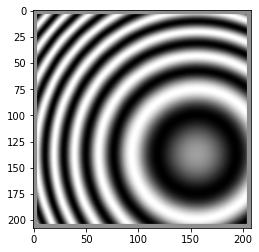

In [12]:
# Test image
test_image = img

# Window size
seq_length = 9

# Determine image shape
rows = test_image.shape[0]
columns = test_image.shape[1]
print('Test image: ' + str(test_image.shape))
plt.imshow(np.real(test_image), cmap = 'gray')
plt.show()

# Determine h pixels to frame the image
h = int((seq_length/2))

# Determine framing background image
frame = np.ones([rows+2*h, columns+2*h], dtype = complex)
print('Frame background: ' + str(frame.shape))

# Insert image into the frame
frame[h:rows+h, h:columns+h] = test_image
plt.imshow(np.real(frame), cmap = 'gray')
plt.show()

**1D Pseudo-Wigner Distribution (x axis)**

In [13]:
def wigner_distribution1(test_image, N, k_list, col):
    """
    Calculate the 1D pseudo-Wigner distribution of the test_image, N is the lenght in pixels of the operating windows, 
    k_list is a list with the frequencies and col is the column of test_image where the calculation will be made
    """
    # Determine image shape
    rows = test_image.shape[0]
    columns = test_image.shape[1]
    
    # Determine h pixels to frame the image
    h = int((seq_length/2))

    # Determine framing background image
    frame = np.ones([rows+2*h, columns+2*h], dtype = complex)
    
    # Insert image into the frame
    frame[h:rows+h, h:columns+h] = test_image
    
    # Image with complex values
    z = frame
    
    # Auxiliary variable
    aux = 0
    pi = np.pi

    # 1D Wigner distribution
    wd = np.ones([rows, len(k_list)], dtype = complex)

    # Loop through the rows (x axis)
    for r in range(rows):

        if np.mod(r, 50) == 0:
            print('Row:' + str(r))

        # Adapt the position for the frame background image
        n = r + int(N/2)

        # Reset to zero (auxiliary variable)
        y = 0

        # Loop through the x frequency (Fx)
        for k in k_list:

            # Sum in the spatial interval
            aux = 0
            for m in range(-int(N/2), int(N/2 - 1) + 1):
                #print('z[' + str(n + m) + ', 1]' + 'z[' + str(n - m) + ', 1]')
                aux = (z[n + m, col] * np.conj(z[n - m, col])) * (np.exp(1j * 2 * pi * k *(2*pi/N))) + aux

            wd[r, y] = 2*aux

            # Upgrade variable
            y = y + 1
        
    return wd

Frequency length: 200
Row:0
Row:50
Row:100
Row:150
WD:(200, 200)


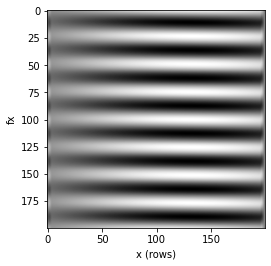

In [29]:
# Window's length 
N = 8

# Frequency in the x-axis (Fx)
k_list = np.arange(-5, 5, 0.05)
print('Frequency length: ' + str(len(k_list)))

# Column
col = 10 

# 1D pseudo-Wigner distribution
wd = wigner_distribution1(test_image, N, k_list, col)
print('WD:' + str(wd.shape))

# Transpose the matrix
wd_t = wd.transpose()

plt.imshow(np.real(wd_t), cmap = 'gray')
plt.xlabel('x (rows)')
plt.ylabel('fx')
plt.savefig(path + '\\output\\wigner_distribution\\wd_x.png')
plt.show()

In [25]:
path

'C:\\Users\\flucasamar\\Desktop\\Github\\computerGeneratedHolography'

**1D Pseudo-Wigner Distribution (y axis)**

In [15]:
def wigner_distribution2(test_image, N, k_list, row):
    """
    Calculate the 1D pseudo-Wigner distribution of the test_image, N is the lenght in pixels of the operating windows, 
    k_list is a list with the frequencies and row is the row of test_image where the calculation will be made
    """
    # Determine image shape
    rows = test_image.shape[0]
    columns = test_image.shape[1]
    
    # Determine h pixels to frame the image
    h = int((seq_length/2))

    # Determine framing background image
    frame = np.ones([rows+2*h, columns+2*h], dtype = complex)
    
    # Insert image into the frame
    frame[h:rows+h, h:columns+h] = test_image
    
    # Image with complex values
    z = frame
    
    # Auxiliary variable
    aux = 0
    pi = np.pi
    x = 0

    # 1D Wigner distribution
    wd = np.ones([columns, len(k_list)], dtype = complex)

    # Loop through the rows (x axis)
    for c in range(columns):

        if np.mod(c, 50) == 0:
            print('Column:' + str(c))

        # Adapt the position for the frame background image
        n = c + int(N/2)

        # Reset to zero
        x = 0
        
        # Loop through the y frequency (Fy)
        for k in k_list:

            # Sum in the spatial interval
            aux = 0
            for m in range(-int(N/2), int(N/2 - 1) + 1):
                #print('z[' + str(n + m) + ', 1]' + 'z[' + str(n - m) + ', 1]')
                aux = (z[row, n + m] * np.conj(z[row, n - m])) * (np.exp(1j * 2 * pi * k *(2*pi/N))) + aux

            wd[c, x] = 2*aux

            # Upgrade variable
            x = x + 1
        
    return wd

Frequency length: 200
Column:0
Column:50
Column:100
Column:150
WD:(200, 200)


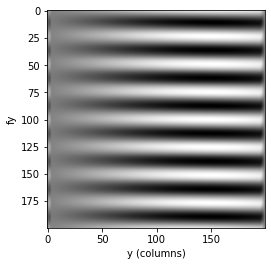

In [30]:
# Window's length 
N = 8

# Frequency in the x-axis (Fx)
k_list = np.arange(-5, 5, 0.05)
print('Frequency length: ' + str(len(k_list)))

# Column
row = 5 

# 1D pseudo-Wigner distribution
wd = wigner_distribution2(test_image, N, k_list, row)
print('WD:' + str(wd.shape))

# Transpose the matrix
wd_t = wd.transpose()

plt.imshow(np.real(wd_t), cmap = 'gray')
plt.xlabel('y (columns)')
plt.ylabel('fy')
plt.savefig(path + '\\output\\wigner_distribution\\wd_y.png')
plt.show()

**1D Pseudo-Wigner Distribution - Reshaped image**

In [20]:
frame_reshape = np.reshape(frame, (frame.shape[0]*frame.shape[1] ,))
print('Reshaped frame:' + str(frame_reshape.shape))

z = frame_reshape

img_reshape = np.reshape(test_image, (test_image.shape[0]*test_image.shape[1] ,))
print('Reshaped image test:' + str(img_reshape.shape))

Reshaped frame:(43264,)
Reshaped image test:(40000,)


In [21]:
%%time

# Window's length 
N = 8

# Frequency in the x-axis (Fx)
k_list = np.arange(-5, 5, 0.05)
print('Frequency length: ' + str(len(k_list)))

# Auxiliary variable
aux = 0
pi = np.pi
y = 0

# 1D Wigner distribution
wd = np.ones([img_reshape.shape[0], len(k_list)], dtype = complex)
print('WD:' + str(wd.shape))

# Loop through all positions
for pos in range(img_reshape.shape[0]):
    
    if np.mod(pos, 1000) == 0:
        print('Pixel:' + str(pos))
    
    # Adapt the position for the frame background image
    n = pos + int(N/2)
    
    # Reset to zero
    y = 0
    
    # Loop through the frequency
    for k in k_list:
    
        # Sum in the spatial interval
        aux = 0
        for m in range(-int(N/2), int(N/2 - 1) + 1):
#             #print('z[' + str(n + m) + ', 1]' + 'z[' + str(n - m) + ', 1]')
            aux = (z[n + m] * np.conj(z[n - m])) * (np.exp(1j * 2 * pi * k *(2*pi/N))) + aux
    
        wd[pos, y] = 2*aux
        
        # Upgrade variable
        y = y + 1
        
print('Finished!')

Frequency length: 200
WD:(40000, 200)
Pixel:0
Pixel:1000
Pixel:2000
Pixel:3000
Pixel:4000
Pixel:5000
Pixel:6000
Pixel:7000
Pixel:8000
Pixel:9000
Pixel:10000
Pixel:11000
Pixel:12000
Pixel:13000
Pixel:14000
Pixel:15000
Pixel:16000
Pixel:17000
Pixel:18000
Pixel:19000
Pixel:20000
Pixel:21000
Pixel:22000
Pixel:23000
Pixel:24000
Pixel:25000
Pixel:26000
Pixel:27000
Pixel:28000
Pixel:29000
Pixel:30000
Pixel:31000
Pixel:32000
Pixel:33000
Pixel:34000
Pixel:35000
Pixel:36000
Pixel:37000
Pixel:38000
Pixel:39000
Finished!
Wall time: 5min 9s


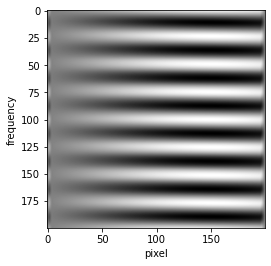

In [31]:
wd_t = wd.transpose()

plt.imshow(np.real(wd_t), cmap = 'gray')
plt.xlabel('pixel')
plt.ylabel('frequency')
plt.show()

## 2D Wigner Distribution (4D fonction) from scratch

Image: (261, 263)


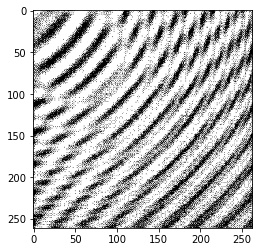

In [136]:
# Load image
img = plt.imread('image_test_3.PNG')

# Convert to gray (2 dimensions)
img = rgb2gray(img)

print('Image: ' + str(img.shape))

plt.imshow(img, cmap = 'gray')
plt.show()

In [137]:
def create_background(image, rows, columns, seq_length):
    
    # Determine h pixels to frame the image
    h = int((seq_length/2))
    
    # Determine framing background image
    frame = np.ones([rows + 2*h, columns + 2*h], dtype = complex)

    # Insert image into the frame
    frame[h:rows+h, h:columns+h] = image
    
    return frame

In [138]:
def kernel_function(m, n, r, s, f):
    
    K = f[m + r, n + s] * np.conj(f[m - r, n - s])
    
    return K

In [141]:
def wigner_distribution_2d_point(image, seq_length, x, y, fx, fy):
    
    print('Calculating...')
    
    # Image's size
    rows = image.shape[0]
    columns = image.shape[1]
    
    # Create a background image
    frame = create_background(image, rows, columns, seq_length)
    
    # Compute the distribution over the frame
    f = frame
    
    # 2D Wigner distribution
    p = fx.shape[0]
    q = fy.shape[0]
    
    wigner_2d = np.ones(([p, q]), dtype = complex)
    
    # Determine h pixels to frame the image
    h = int((seq_length/2))
    
    # Sum goes from -L to L
    L = int(seq_length/2)
    N = 2*L + 2 # VERIFY!!!!!!!!!!!!!!!!!!!!
    
    # Calculate the distribution in the (x, y) position of the image
    for m in range(x, x + 1):
 
        for n in range(y, y + 1):

            # Loop through the positions in the wigner 2D matrix
            for u in range(p):

                # Loop through the u axis (fx)
                u_fx = fx[u]
                
                # Loop through the positions in the wigner 2D matrix
                for v in range(q):
                    
                    # Loop through the v axis (fy)
                    v_fy = fy[v]
                    
                    # Reset variable
                    aux = 0

                    # Sum
                    for r in range(-int(seq_length/2), int(seq_length/2 - 1) + 2):
                        
                        # Sum
                        for s in range(-int(seq_length/2), int(seq_length/2 - 1) + 2):

                            K = kernel_function(m + h, n + h, r, s, frame)
                            #aux = K * np.exp(-4j*pi*(r*u + s*v)/N)
                            aux = K * np.exp(-4j*pi*(r*u_fx + s*v_fy)/N)

                    wigner_2d[u,v] = aux
                    
    print('Calculated!')
    
    return wigner_2d

In [142]:
%%time

# Window's length
seq_length = 9

# Frequency in the x-axis
fx = np.arange(-5, 5, 0.05)

# Frequency in the y-axis
fy = np.arange(-5, 5, 0.05)

# Position in the image (spatial coordinates)
x = 0
y = 0

# Calculate 2D pseudo-wigner distribution
wigner_2d = wigner_distribution_2d_point(img, seq_length, x, y, fx, fy)
print('Wigner distribution 2D:' + str(wigner_2d.shape))

Calculating...
Calculated!
Wigner distribution 2D:(200, 200)
Wall time: 25 s


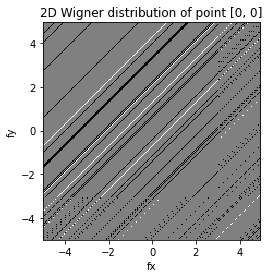

In [149]:
# Scales according to spatial frequencies
lim_inf = fx[0]
lim_sup = fx[len(fx) - 1]

# Display result
plt.imshow(np.abs(wigner_2d), cmap = 'gray', extent = [lim_inf, lim_sup, lim_inf, lim_sup])
plt.title('2D Wigner distribution of point [%d, %d]' %(x, y))
plt.xlabel('fx')
plt.ylabel('fy')
plt.show()

(200, 200)
<class 'numpy.complex128'>


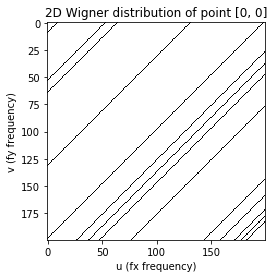

In [76]:
print(wd_2d.shape)
print(type(wd_2d[0,0]))
#print(wd_2d)

plt.imshow(np.abs(wd_2d), cmap = 'gray')
plt.title('2D Wigner distribution of point [%d, %d]' %(m, n))
plt.xlabel('u (fx frequency)')
plt.ylabel('v (fy frequency)')
plt.show()

## Brouillon

Spatial frequency lenght: (200,)
Frame background: (269, 271)


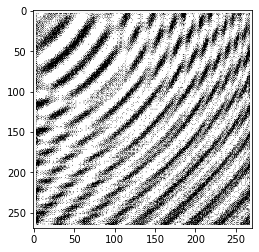

Wall time: 227 ms


In [34]:
%%time

"""
To any point (x,y) of a 2D image we are going to assing a 2D
spatial-frequency spectrum
"""

# Window's length
seq_length = 9

# u and v are the spatial frequencies

# Frequency in the x-axis
fx = np.arange(-5, 5, 0.05)
print('Spatial frequency lenght: ' + str(fx.shape))

# Frequency in the y-axis
fy = np.arange(-5, 5, 0.05)

# Determine h pixels to frame the image
h = int((seq_length/2))

# Image's size
rows = img.shape[0]
columns = img.shape[1]

# Determine framing background image
frame = np.ones([rows+2*h, columns+2*h], dtype = complex)

# Insert image into the frame
frame[h:rows+h, h:columns+h] = img
print('Frame background: ' + str(frame.shape))

plt.imshow(np.real(frame), cmap = 'gray')

plt.show()

In [61]:
w = np.fft.fft2(img * np.conj(img))
w.shape

(200, 200)

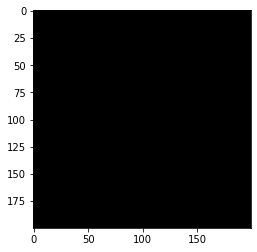

In [62]:
plt.imshow(np.real(w), cmap = 'gray')

In [44]:
def run(self):
    
    lh = (self.fwindow.shape[0] - 1) // 2

    for icol in range(self.ts.shape[0]):

        taumaxvals = (icol, self.signal.shape[0] - icol - 1,
                      np.round(self.n_fbins / 2.0), lh)

        taumax = np.min(taumaxvals)

        tau = np.arange(-taumax, taumax + 1).astype(int)

        indices = np.remainder(self.n_fbins + tau, self.n_fbins).astype(int)

        self.tfr[indices, icol] = self.fwindow[lh + tau] * self.signal[icol + tau] * \
            np.conj(self.signal[icol - tau])

        tau = np.round(self.n_fbins / 2.0)

        if (icol <= self.signal.shape[0] - tau) and (icol >= tau + 1) and (tau <= lh):
            self.tfr[int(tau), icol] = self.fwindow[lh + tau] * \
                self.signal[icol + tau, 0] * np.conj(self.signal[icol - tau, 0]) + \
                self.fwindow[lh - tau] * self.signal[icol - tau, 0] * \
                np.conj(self.signal[icol + tau, 0])
            self.tfr[int(tau), icol] *= 0.5

    self.tfr = np.fft.fft(self.tfr, axis=0
                         )
    return np.real(self.tfr), self.ts, self.freqs
